<a href="https://colab.research.google.com/github/callmesidhu/ML-Cubic-Equation-Solver/blob/main/cubic_equation_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sympy import Symbol, solve
import matplotlib.pyplot as plt

In [14]:
def relu(x):
    return max(0.0, x)

In [15]:
def solve_cubic_sgd_with_relu(a, b, c, d, learning_rate=0.01, num_iterations=1000):
    x = 0.0
    for i in range(num_iterations):
        y = a * x**3 + b * x**2 + c * x + d
        relu_y = relu(y)
        grad_y = 3 * a * x**2 + 2 * b * x + c
        gradient = 2 * relu_y * grad_y if relu_y > 0 else 0
        x -= learning_rate * gradient
    return x

In [16]:
def solve_cubic_sympy(a, b, c, d):
    x = Symbol('x')
    equation = a*x**3 + b*x**2 + c*x + d
    return solve(equation, x)

In [17]:
a = 1
b = -1
c = 2
d = -1

In [18]:
solution_relu_sgd = solve_cubic_sgd_with_relu(a, b, c, d)
print("SGD with ReLU Solution (approx):", solution_relu_sgd)

SGD with ReLU Solution (approx): 0.0


In [19]:
sympy_solutions = solve_cubic_sympy(a, b, c, d)
print("SymPy Solutions:", sympy_solutions)

SymPy Solutions: [1/3 + (-1/2 - sqrt(3)*I/2)*(11/54 + sqrt(69)/18)**(1/3) - 5/(9*(-1/2 - sqrt(3)*I/2)*(11/54 + sqrt(69)/18)**(1/3)), 1/3 - 5/(9*(-1/2 + sqrt(3)*I/2)*(11/54 + sqrt(69)/18)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(11/54 + sqrt(69)/18)**(1/3), -5/(9*(11/54 + sqrt(69)/18)**(1/3)) + 1/3 + (11/54 + sqrt(69)/18)**(1/3)]


Visualization

In [20]:
def solve_cubic_sgd_with_tracking(a, b, c, d, learning_rate=0.01, num_iterations=1000):
    x = 0.0
    x_vals = []
    for i in range(num_iterations):
        y = a * x**3 + b * x**2 + c * x + d
        relu_y = relu(y)
        grad_y = 3 * a * x**2 + 2 * b * x + c
        gradient = 2 * relu_y * grad_y if relu_y > 0 else 0
        x -= learning_rate * gradient
        x_vals.append(x)
    return x, x_vals

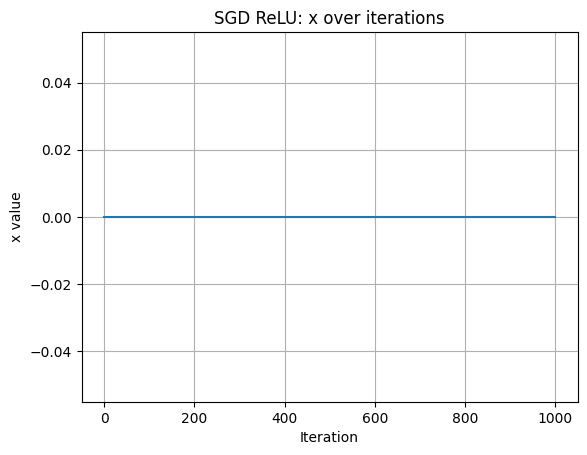

In [21]:
final_x, x_progression = solve_cubic_sgd_with_tracking(a, b, c, d)
plt.plot(x_progression)
plt.title("SGD ReLU: x over iterations")
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.grid()
plt.show()